In [1]:
from linares_plot import *

In [3]:
import os 
os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons')

### Load data
cd_DLPFC_hm = np.load('cd_DLPFC_hm.npy')

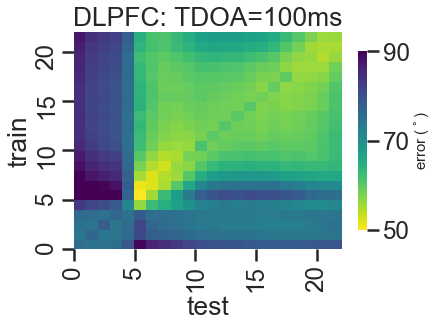

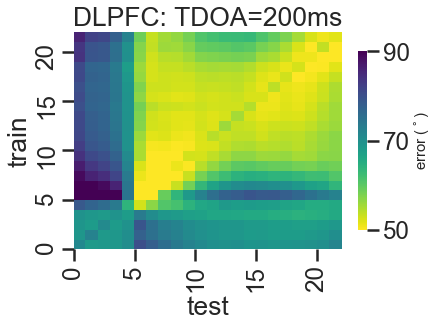

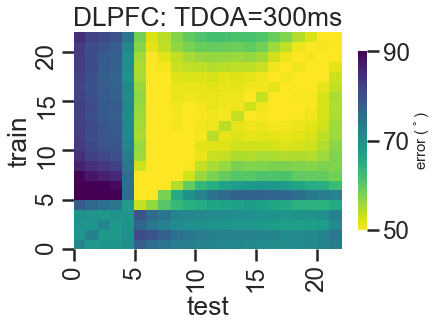

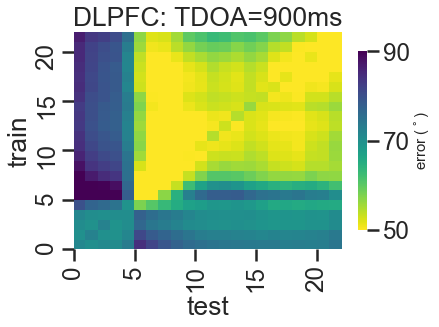

In [5]:
def heatmap(data, title):
    ax = sns.heatmap(data,vmin=50, vmax=90, cmap= 'viridis_r',
                    cbar_kws={"shrink": .82, 'ticks' : [50, 70, 90], 'label': 'error ($^\circ$)'}) ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('train')
    plt.gca().set_xlabel('test')
    plt.gca().set_title(title)
    plt.gca().set_xticks([0,5,10,15,20])
    plt.gca().set_xticklabels([0,5,10,15,20])
    plt.gca().set_yticks([0,5,10,15,20])
    plt.gca().set_yticklabels([0,5,10,15,20])
    plt.show(block=False)
    

    
PFC_0 =  cd_DLPFC_hm[0]
heatmap(PFC_0, 'DLPFC: TDOA=100ms')

PFC_100 =  cd_DLPFC_hm[1]
heatmap(PFC_100, 'DLPFC: TDOA=200ms')

PFC_200 =  cd_DLPFC_hm[2]
heatmap(PFC_200, 'DLPFC: TDOA=300ms')

PFC_800 =  cd_DLPFC_hm[3]
heatmap(PFC_800, 'DLPFC: TDOA=900ms')

In [7]:
## in the local
os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\Shuffle')

##Load shuffle neuron by neuron
shuffle_conditions = np.load('Shuffle_each_conditions.npy', encoding = 'latin1')
#shuffle_conditions= shuffle_conditions[0]

In [38]:
DLPFC_0 = np.load('0_DLPFC.npy')
DLPFC_100 = np.load('100_DLPFC.npy')
DLPFC_200 = np.load('200_DLPFC.npy')
DLPFC_800 = np.load('800_DLPFC.npy')

In [85]:
import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [134]:
options = np.arange(0, len(df_train))

In [135]:
options

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140])

In [142]:
trials_train = random.sample(list(options), int(percentage_training*len(options)))
trials_train

[41,
 129,
 87,
 139,
 85,
 78,
 94,
 8,
 134,
 26,
 65,
 48,
 93,
 76,
 128,
 37,
 115,
 24,
 18,
 55,
 0,
 51,
 117,
 67,
 47,
 68,
 44,
 107,
 7,
 90,
 12,
 83,
 56,
 69,
 111,
 118,
 34,
 66,
 96,
 4,
 46,
 91,
 17,
 97,
 100,
 110,
 104,
 106,
 102,
 116,
 84,
 114,
 35,
 109,
 60,
 42,
 126,
 137,
 75,
 88,
 30,
 21,
 77,
 138,
 74,
 81,
 43,
 52,
 23,
 3,
 98,
 131,
 70,
 95,
 1,
 16,
 61,
 73,
 79,
 53,
 64,
 58,
 62,
 99,
 25,
 101,
 19,
 63,
 92,
 39,
 133,
 103,
 57,
 135,
 130,
 22,
 108,
 40,
 33,
 54,
 125,
 36,
 122,
 14,
 105,
 2,
 124,
 89,
 140,
 82,
 45,
 59]

In [144]:
df_train.iloc[trials_train]

,firing,beh,neuron
41,0,315,1367701
129,0.047619,90,1367701
87,0,225,1367701
139,0.047619,270,1367701
85,0.047619,90,1367701
...,...,...,...
89,0,270,1367701
140,0,270,1367701
82,0,270,1367701
45,0.0952381,90,1367701


In [145]:
df_train

,firing,beh,neuron
0,0,0,1367701
1,0,225,1367701
2,0,315,1367701
3,0.047619,0,1367701
4,0,45,1367701
...,...,...,...
136,0.333333,45,1367701
137,0,270,1367701
138,0,270,1367701
139,0.047619,270,1367701


In [148]:
list(set(options) - set(trials_train))

[132,
 5,
 6,
 136,
 9,
 10,
 11,
 13,
 15,
 20,
 27,
 28,
 29,
 31,
 32,
 38,
 49,
 50,
 71,
 72,
 80,
 86,
 112,
 113,
 119,
 120,
 121,
 123,
 127]

In [166]:

def decoder_tr_ts(df_train, df_test, splits=10, percentage_training=0.8, cross_val=True):
    #### Input : dataframe with three columns: (spikes, behaviour and neuron label)
    df_train.columns=['firing', 'beh', 'neuron']
    df_test.columns=['firing', 'beh', 'neuron']    
    ######
    ######## Cross validation ########
    ######## different lengths of taringn and testing #####
    errors_splits=[]
    options_train = np.arange(0, len(df_train))
    options_test = np.arange(0, len(df_test))
    for s in range(splits):
        # training
        trials_train = random.sample(list(options_train), int(percentage_training*len(options_train)))
        X_train = df_train.iloc[trials_train].firing.values
        y_train = df_train.iloc[trials_train].beh.values
        #
        if cross_val==True: ##same number of trials per neuron
            trials_test = list(set(options_train) - set(trials_train))
            X_test = df_test.iloc[trials_test].firing.values ## the trials not used for training and the rest
            y_test = df_test.iloc[trials_test].beh.values
        else:
            if len(options_train) == len(options_test):
                trials_test = list(set(options_train) - set(trials_train))
                X_test = df_test.iloc[trials_test].firing.values ## the trials not used for training and the rest
                y_test = df_test.iloc[trials_test].beh.values
            else:
                trials_test= random.sample(list(options_test), int((1-percentage_training)*len(options_test)))
                X_test = df_test.iloc[trials_test].firing.values ## the trials not used for training and the rest
                y_test = df_test.iloc[trials_test].beh.values
            
        ######## Trainning #########
        ## X matrix (intercept and spikes)
        X = np.column_stack([np.ones(np.shape(X_train)[0]), X_train])
        X = np.array(X, dtype=float) 
        ## Y (sinus and cos)
        sinus =np.sin([np.radians(np.array(y_train)[i]) for i in range(0, len(y_train))])
        cosinus = np.cos([np.radians(np.array(y_train)[i]) for i in range(0, len(y_train))])
        Y = np.column_stack([cosinus, sinus])
        ### one OLS for sin and cos: output: beta of intercetp and bea of spikes (two B intercepts and 2 B for spikes )
        model = sm.OLS(Y, X)
        ##train the model
        fit=model.fit()
        ######### Testing ###########
        X = np.column_stack([np.ones(np.shape(X_test)[0]),X_test])
        p = fit.predict(X)
        x = p[:,0]
        y = p[:,1]
        #####
        ##### Error --> take the resulting vector in sin/cos space
        ### from sin and cos get the angle (-pi, pi)
        #pred_angle = [ np.degrees(np.arctan2(y[i], x[i]) + np.pi) for i in range(0, len(y))]
        pred_angle = [ np.degrees(np.arctan2(y[i], x[i])) for i in range(0, len(y))]
        for i in range(0, len(pred_angle)):
            if pred_angle[i]<0:
                pred_angle[i]=360+pred_angle[i]
        ##
        #
        #print(beh_test)
        error_trial=[ circdist(y_test[i], pred_angle[i]) for i in range(0, len(pred_angle))]
        mean_error = np.round(np.mean(error_trial),2)
        errors_splits.append(mean_error)
    ##
    ## mean of all the splits
    mean_error = round(np.mean(errors_splits),2)

    return mean_error

In [ ]:
Conditions_titles = ['DLPFC_0'] #, 'DLPFC_100', 'DLPFC_200', 'DLPFC_800']
Conditions = [DLPFC_0] #, DLPFC_100, DLPFC_200, DLPFC_800]

shuffled_neurons = []

for cond in range(0,len(Conditions_titles)): 
    shuffled_ = np.zeros((22,22))
    for idx_training, training_time in enumerate(range(1, 23)):
        print(training_time)
        df_train = shuff[[training_time, 0, 23]]
        df_train.columns=['rate', 'angle', 'neuron']
        df_train = df_train.dropna()
        for idx_testing, testing_time in enumerate(range(1, 23)):
            df_test = shuff[[testing_time, 0, 23]]
            df_test.columns=['rate', 'angle', 'neuron']
            ###
            beh_values = df_test.angle.values.copy()
            np.random.shuffle(beh_values)
            df_test['angle'] = beh_values
            df_test = df_test.dropna()
            ####
            if training_time==testing_time :
                cross_validation=True
            else:
                cross_validation=False
            err_ = decoder_tr_ts(df_train, df_test, splits=10, percentage_training=0.8, cross_val=cross_validation)
            shuffled_[idx_training, idx_testing] =err_
            #
        #


1


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [171]:
df_train.isnan

AttributeError: 'DataFrame' object has no attribute 'isnan'

In [167]:
Conditions_titles = ['DLPFC_0'] #, 'DLPFC_100', 'DLPFC_200', 'DLPFC_800']
Conditions = [DLPFC_0] #, DLPFC_100, DLPFC_200, DLPFC_800]

shuffled_neurons = []

for cond in range(0,len(Conditions_titles)): #8  
    for Neuron in shuff[23].unique():
        df_neuron = shuff.loc[shuff[23] == Neuron]
        shuffled_ = np.zeros((22,22))
        for idx_training, training_time in enumerate(range(1, 23)):
            print(training_time)
            df_train = df_neuron[[training_time, 0, 23]]
            df_train.columns=['rate', 'angle', 'neuron']
            for idx_testing, testing_time in enumerate(range(1, 23)):
                df_test = df_neuron[[testing_time, 0, 23]]
                df_test.columns=['rate', 'angle', 'neuron']
                ###
                beh_values = df_test.angle.values.copy()
                np.random.shuffle(beh_values)
                df_test['angle'] = beh_values
                ####
                if training_time==testing_time :
                    cross_validation=True
                else:
                    cross_validation=False
                err_ = decoder_tr_ts(df_train, df_test, splits=10, percentage_training=0.8, cross_val=cross_validation)
                shuffled_[idx_training, idx_testing] =err_
                #
            #
        #
    #
    shuffled_neurons.append(shuffled_)

            

1


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
1
2
3
4
5
6


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),


MissingDataError: exog contains inf or nans

In [123]:

splits=100
percentage_training=0.8


#### Input : dataframe with three columns: (spikes, behaviour and neuron label)
df_train.columns=['firing', 'beh', 'trial']
df_test.columns=['firing', 'beh', 'trial']    
######
######## Cross validation ########
######## different lengths of taringn and testing #####
errors_splits=[]
options = df_train.trial.unique()

In [124]:
for s in range(splits):
    # training
    trials_train = random.sample(list(options), int(percentage_training*len(options)))
    X_train = df_train.loc[df_train['trial'].isin(trials_train)].firing.values
    y_train = df_train.loc[df_train['trial'].isin(trials_train)].beh.values
    X_test = df_test.loc[~df_test['trial'].isin(trials_train)].firing.values ## the trials not used for training and the rest
    y_test = df_test.loc[~df_test['trial'].isin(trials_train)].beh.values

In [129]:
trials_train

[]

In [125]:
X = np.column_stack([np.ones(np.shape(X_train)[0]), X_train])

In [126]:
sinus =np.sin([np.radians(np.array(y_train)[i]) for i in range(0, len(y_train))])
cosinus = np.cos([np.radians(np.array(y_train)[i]) for i in range(0, len(y_train))])
Y = np.column_stack([cosinus, sinus])

In [127]:
Y

array([], shape=(0, 2), dtype=float64)

In [128]:
X

array([], shape=(0, 2), dtype=object)

In [107]:
sinus =np.sin([np.radians(np.array(y_train)[i]) for i in range(0, len(y_train))])
cosinus = np.cos([np.radians(np.array(y_train)[i]) for i in range(0, len(y_train))])
Y = np.column_stack([cosinus, sinus])
### one OLS for sin and cos: output: beta of intercetp and bea of spikes (two B intercepts and 2 B for spikes )
model = sm.OLS(Y, X)
##train the model
fit=model.fit()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:




    ######## Trainning #########
    ## X matrix (intercept and spikes)
    X = np.column_stack([np.ones(np.shape(X_train)[0]), X_train])
    ## Y (sinus and cos)
    sinus =np.sin([np.radians(np.array(y_train)[i]) for i in range(0, len(y_train))])
    cosinus = np.cos([np.radians(np.array(y_train)[i]) for i in range(0, len(y_train))])
    Y = np.column_stack([cosinus, sinus])
    ### one OLS for sin and cos: output: beta of intercetp and bea of spikes (two B intercepts and 2 B for spikes )
    model = sm.OLS(Y, X)
    ##train the model
    fit=model.fit()
    ######### Testing ###########
    X = np.column_stack([np.ones(np.shape(X_test)[0]),X_test])
    p = fit.predict(X)
    x = p[:,0]
    y = p[:,1]
    #####
    ##### Error --> take the resulting vector in sin/cos space
    ### from sin and cos get the angle (-pi, pi)
    #pred_angle = [ np.degrees(np.arctan2(y[i], x[i]) + np.pi) for i in range(0, len(y))]
    pred_angle = [ np.degrees(np.arctan2(y[i], x[i])) for i in range(0, len(y))]
    for i in range(0, len(pred_angle)):
        if pred_angle[i]<0:
            pred_angle[i]=360+pred_angle[i]
    ##
    #
    #print(beh_test)
    error_trial=[ circdist(y_test[i], pred_angle[i]) for i in range(0, len(pred_angle))]
    mean_error = np.round(np.mean(error_trial),2)
    errors_splits.append(mean_error)
##
## mean of all the splits
mean_error = round(np.mean(errors_splits),2)

return mean_error

In [99]:
df_train.beh.iloc[0]

0.0

In [98]:
df_test.beh.iloc[0]

270.0

In [78]:
beh_values = df_test[0].values.copy()
np.random.shuffle(beh_values)
df_test[0] = beh_values


[0.0 225.0 315.0 ... 45.0 270.0 0.0]
0       270
1       270
2       270
3       315
4         0
       ... 
8796    315
8797    225
8798     45
8799     90
8800    225
Name: 0, Length: 8801, dtype: object


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [61]:
df_test[0].values

array([135.0, 90.0, 135.0, ..., 270.0, 315.0, 225.0], dtype=object)

In [46]:
[len(shuff.groupby(23).get_group(n)) for n in shuff[23].unique()]

[141,
 132,
 131,
 104,
 116,
 115,
 112,
 91,
 102,
 159,
 122,
 94,
 141,
 141,
 146,
 139,
 130,
 154,
 140,
 140,
 125,
 144,
 140,
 154,
 154,
 138,
 155,
 154,
 154,
 154,
 155,
 139,
 154,
 154,
 153,
 141,
 156,
 153,
 154,
 152,
 154,
 155,
 154,
 141,
 161,
 160,
 141,
 160,
 151,
 151,
 155,
 95,
 63,
 154,
 153,
 140,
 159,
 63,
 104,
 193,
 186,
 110,
 165]

In [45]:
len(shuff[23].unique())

63

In [16]:
np.shape(shuffle_conditions)

(8, 285, 176)

In [29]:
np.shape(shuffle_conditions[4])

(285, 176)

In [30]:
np.shape(shuffle_conditions[4][0])

(176,)

In [37]:
len(shuffle_conditions[4][23][2])

44

In [9]:
np.shape(cd_DLPFC_hm)

(4, 22, 22)

In [17]:
os.chdir('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\FR_trials') #David_all_cond
DLPFC_0 = np.load('0_DLPFC.npy')
DLPFC_100 = np.load('100_DLPFC.npy')
DLPFC_200 = np.load('200_DLPFC.npy')
DLPFC_800 = np.load('800_DLPFC.npy')

In [18]:
np.shape(DLPFC_0)

(8801, 24)

In [24]:
DLPFC_0[0, :]

array([0.0, 0.0, 0.0, 0.047619047619047616, 0.14285714285714285,
       0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.047619047619047616, 0.0,
       0.0, 0.047619047619047616, 0.0, 0.0, 0.0, 0.23809523809523808,
       0.23809523809523808, 0.09523809523809523, 0.047619047619047616,
       0.047619047619047616, 0.0, '1367701'], dtype=object)

In [25]:
DLPFC_0[800, :]

array([180.0, 0.28, 0.24, 0.2, 0.32, 0.4, 0.48, 0.52, 0.64, 0.96, 0.76,
       0.76, 0.64, 0.68, 0.76, 0.52, 0.6, 0.56, 0.44, 0.4, 0.4, 0.48,
       0.48, '1370202'], dtype=object)

In [28]:
np.unique(DLPFC_0[:, 0])

array([0.0, 45.0, 90.0, 135.0, 180.0, 225.0, 270.0, 315.0], dtype=object)

In [130]:

def decoder_cv(df_train, df_test, splits=100, percentage_training=0.8):
    #### Input : dataframe with three columns: (spikes, behaviour and neuron label)
    df_train.columns=['firing', 'beh', 'neuron']
    df_test.columns=['firing', 'beh', 'neuron']    
    ######
    ######## Cross validation ########
    ######## different lengths of taringn and testing #####
    errors_splits=[]
    options = len(df_train)
    for s in range(splits):
        # training
        trials_train = random.sample(list(options), int(percentage_training*len(options)))
        X_train = df_train.loc[df_train['trial'].isin(trials_train)].firing.values
        y_train = df_train.loc[df_train['trial'].isin(trials_train)].beh.values
        X_test = df_test.loc[~df_test['trial'].isin(trials_train)].firing.values ## the trials not used for training and the rest
        y_test = df_test.loc[~df_test['trial'].isin(trials_train)].beh.values
        ######## Trainning #########
        ## X matrix (intercept and spikes)
        X = np.column_stack([np.ones(np.shape(X_train)[0]), X_train])
        ## Y (sinus and cos)
        sinus =np.sin([np.radians(np.array(y_train)[i]) for i in range(0, len(y_train))])
        cosinus = np.cos([np.radians(np.array(y_train)[i]) for i in range(0, len(y_train))])
        Y = np.column_stack([cosinus, sinus])
        ### one OLS for sin and cos: output: beta of intercetp and bea of spikes (two B intercepts and 2 B for spikes )
        model = sm.OLS(Y, X)
        ##train the model
        fit=model.fit()
        ######### Testing ###########
        X = np.column_stack([np.ones(np.shape(X_test)[0]),X_test])
        p = fit.predict(X)
        x = p[:,0]
        y = p[:,1]
        #####
        ##### Error --> take the resulting vector in sin/cos space
        ### from sin and cos get the angle (-pi, pi)
        #pred_angle = [ np.degrees(np.arctan2(y[i], x[i]) + np.pi) for i in range(0, len(y))]
        pred_angle = [ np.degrees(np.arctan2(y[i], x[i])) for i in range(0, len(y))]
        for i in range(0, len(pred_angle)):
            if pred_angle[i]<0:
                pred_angle[i]=360+pred_angle[i]
        ##
        #
        #print(beh_test)
        error_trial=[ circdist(y_test[i], pred_angle[i]) for i in range(0, len(pred_angle))]
        mean_error = np.round(np.mean(error_trial),2)
        errors_splits.append(mean_error)
    ##
    ## mean of all the splits
    mean_error = round(np.mean(errors_splits),2)

    return mean_error

In [20]:
def circdist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)



def decoding(df, size_test=0.1):
    #### Input : dataframe with three columns: (spikes, behaviour and neuron label)
    ###Take off nans
    df = df.loc[df.iloc[:,0]<9999]
    df.columns=['spikes', 'beh', 'neuron']
    neuron_means=[]
    ### Train and test on the same neuron --> append the error of each neuron
    pop_err=[]
    
    for Neur in df.neuron.unique():
        ### same neuron 5 times --> mean value
        neur_err=[]
        for rep in range(0,5):
            spikes_train, spikes_test, beh_train, beh_test = train_test_split(df.groupby('neuron').get_group(Neur)['spikes'],
                                                                              df.groupby('neuron').get_group(Neur)['beh'],
                                                                              test_size=size_test)  

            ######## Trainning #########
            ## X matrix (intercept and spikes)
            X = np.column_stack([np.ones(np.shape(spikes_train)[0]),spikes_train])
            ## Y (sinus and cos)
            sinus =np.sin([np.radians(np.array(beh_train)[i]) for i in range(0, len(beh_train))])
            cosinus = np.cos([np.radians(np.array(beh_train)[i]) for i in range(0, len(beh_train))])
            Y = np.column_stack([cosinus, sinus])
            ### one OLS for sin and cos: output: beta of intercetp and bea of spikes (two B intercepts and 2 B for spikes )
            Y = Y.astype(float) #to make it work in the cluster
            X = X.astype(float)
            model = sm.OLS(Y, X)
            ##train the model
            fit=model.fit()

            ######### Testing ###########
            X = np.column_stack([np.ones(np.shape(spikes_test)[0]),spikes_test])
            p = fit.predict(X)
            x = p[:,0]
            y = p[:,1]
            #####
            ##### Error --> take the resulting vector in sin/cos space
            ### from sin and cos get the angle (-pi, pi)
            #pred_angle = [ np.degrees(np.arctan2(y[i], x[i]) + np.pi) for i in range(0, len(y))]
            pred_angle = [ np.degrees(np.arctan2(y[i], x[i])) for i in range(0, len(y))]
            for i in range(0, len(pred_angle)):
                if pred_angle[i]<0:
                    pred_angle[i]=360+pred_angle[i]
            ##
            #error=[ circdist(beh_test[i], pred_angle[i]) for i in range(0, len(pred_angle))]
            error=[ circdist(beh_test.values[i], pred_angle[i]) for i in range(0, len(pred_angle))]
            
            #low_value --> predicted positionns close to real
            neur_err.append(np.mean(error))
            ####
        
        #####       
        pop_err.append(np.mean(neur_err))
        ####
    
    return pop_err

In [ ]:


def decoding_shuffle(df, size_test=0.1):
    #### Input : dataframe with three columns: (spikes, behaviour and neuron label)
    ###Take off nans
    df = df.loc[df.iloc[:,0]<9999]
    df.columns=['spikes', 'beh', 'neuron']
    neuron_means=[]
    ### Train and test on the same neuron --> append the error of each neuron
    pop_err=[]
    
    for Neur in df.neuron.unique():
        ### same neuron 5 times --> mean value
        neur_err=[]
        for rep in range(0,5):
            spikes_train, spikes_test, beh_train, beh_test = train_test_split(df.groupby('neuron').get_group(Neur)['spikes'],
                                                                              df.groupby('neuron').get_group(Neur)['beh'],
                                                                              test_size=size_test)  

            ######## Trainning #########
            ## X matrix (intercept and spikes)
            X = np.column_stack([np.ones(np.shape(spikes_train)[0]),spikes_train])
            ## Y (sinus and cos)
            sinus =np.sin([np.radians(np.array(beh_train)[i]) for i in range(0, len(beh_train))])
            cosinus = np.cos([np.radians(np.array(beh_train)[i]) for i in range(0, len(beh_train))])
            Y = np.column_stack([cosinus, sinus])
            ### one OLS for sin and cos: output: beta of intercetp and bea of spikes (two B intercepts and 2 B for spikes )
            Y = Y.astype(float) #to make it work in the cluster
            X = X.astype(float)
            model = sm.OLS(Y, X)
            ##train the model
            fit=model.fit()

            ######### Testing ###########
            X = np.column_stack([np.ones(np.shape(spikes_test)[0]),spikes_test])
            p = fit.predict(X)
            x = p[:,0]
            y = p[:,1]
            #####
            ##### Error --> take the resulting vector in sin/cos space
            ### from sin and cos get the angle (-pi, pi)
            #pred_angle = [ np.degrees(np.arctan2(y[i], x[i]) + np.pi) for i in range(0, len(y))]
            pred_angle = [ np.degrees(np.arctan2(y[i], x[i])) for i in range(0, len(y))]
            for i in range(0, len(pred_angle)):
                if pred_angle[i]<0:
                    pred_angle[i]=360+pred_angle[i]
            ##
            #error=[ circdist(beh_test[i], pred_angle[i]) for i in range(0, len(pred_angle))]
            error=[ circdist(beh_test.values[i], pred_angle[i]) for i in range(0, len(pred_angle))]
            
            #low_value --> predicted positionns close to real
            neur_err.append(np.mean(error))
            ####
        
        #####       
        pop_err.append(np.mean(neur_err))
        ####
    
    return pop_err